In [27]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")
%matplotlib inline

# For reading stock data from yahoo
from pandas_datareader.data import DataReader
import yfinance as yf

# For time stamps
from datetime import datetime

# Set up End and Start times for data grab
tech_list = ['AAPL', 'GOOG', 'MSFT', 'AMZN', 'TSLA', "NVDA"]

end = datetime.now()
start = datetime(end.year - 1, end.month, end.day)

for stock in tech_list:
    globals()[stock] = yf.download(stock, start, end)

company_list = [AAPL, GOOG, MSFT, AMZN, TSLA, NVDA] # 변수에 저장
company_name = ["APPLE", "GOOGLE", "MICROSOFT", "AMAZON", "TESLA", "NVIDIA"]

for company, com_name in zip(company_list, company_name):
    company["company_name"] = com_name

df = pd.concat(company_list, axis=0)
df.tail(10)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume,company_name
Date,,,,,,,
2023-01-06,144.740005,150.100006,140.339996,148.589996,148.589996,40482300,NVIDIA
2023-01-09,152.839996,160.559998,151.410004,156.279999,156.279999,50423100,NVIDIA
2023-01-10,155.070007,159.619995,154.720001,159.089996,159.089996,38410100,NVIDIA
2023-01-11,158.399994,160.279999,155.630005,160.009995,160.009995,35328500,NVIDIA
2023-01-12,161.000000,166.369995,154.919998,165.110001,165.110001,55140900,NVIDIA
2023-01-13,162.779999,169.220001,161.649994,168.990005,168.990005,44693500,NVIDIA
2023-01-17,168.990005,177.279999,168.990005,177.020004,177.020004,51110200,NVIDIA
2023-01-18,176.669998,178.729996,172.820007,173.770004,173.770004,43962400,NVIDIA
2023-01-19,170.360001,171.970001,167.309998,167.649994,167.649994,45250100,NVIDIA


In [28]:
# Summary Stats
AAPL.describe()

,Open,High,Low,Close,Adj Close,Volume
count,251.000000,251.000000,251.000000,251.000000,251.000000,2.510000e+02
mean,152.613148,154.713386,150.529004,152.689482,152.288053,8.691325e+07
std,13.231253,13.145937,13.255696,13.281543,13.080961,2.414656e+07
min,126.010002,127.769997,124.169998,125.019997,125.019997,3.519590e+07
25%,142.349998,144.510002,140.310005,142.599998,142.229057,7.054080e+07
50%,151.190002,153.720001,149.339996,151.210007,151.070007,8.229120e+07
75%,163.845001,166.174995,161.735001,163.809998,163.295250,9.603815e+07
max,178.550003,179.610001,176.699997,178.960007,178.154037,1.826020e+08


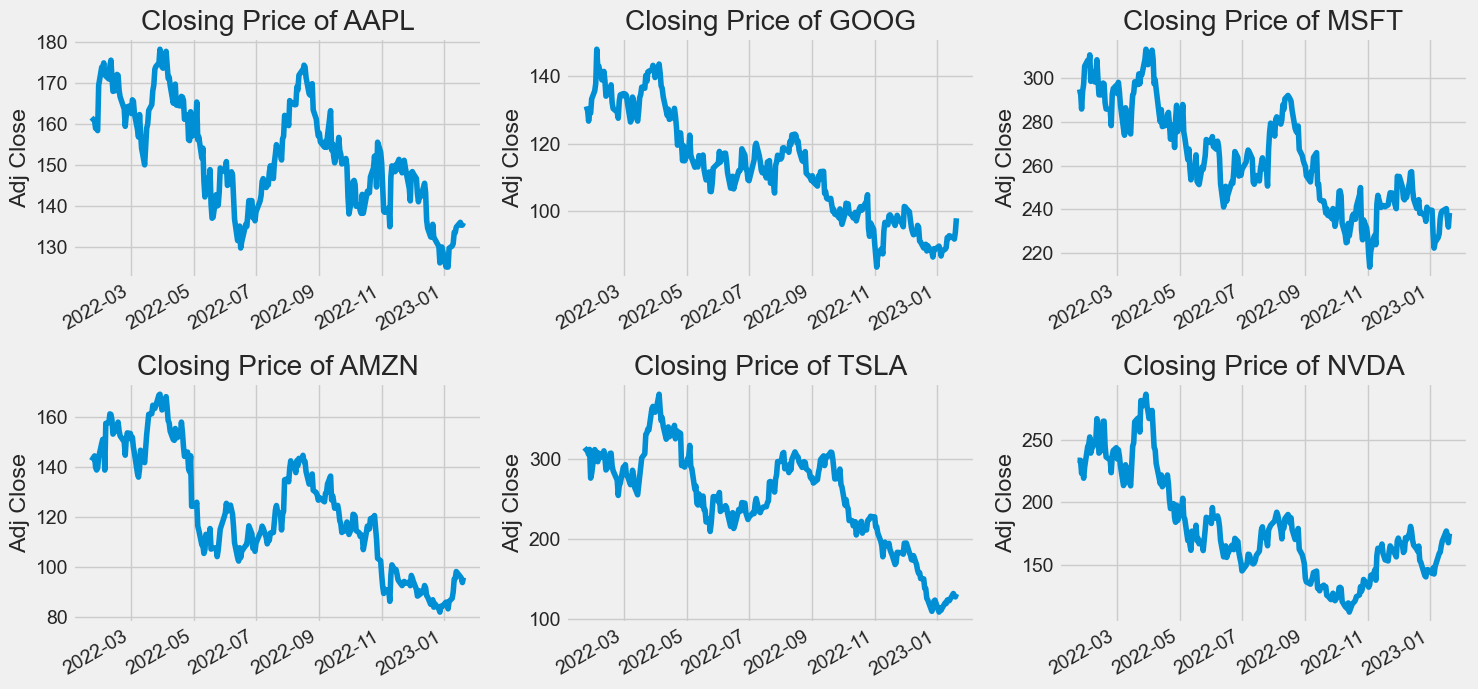

In [29]:
# Let's see a historical view of the closing price
plt.figure(figsize=(15, 10))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
    plt.subplot(3, 3, i)
    company['Adj Close'].plot()
    plt.ylabel('Adj Close')
    plt.xlabel(None)
    plt.title(f"Closing Price of {tech_list[i - 1]}")

plt.tight_layout()

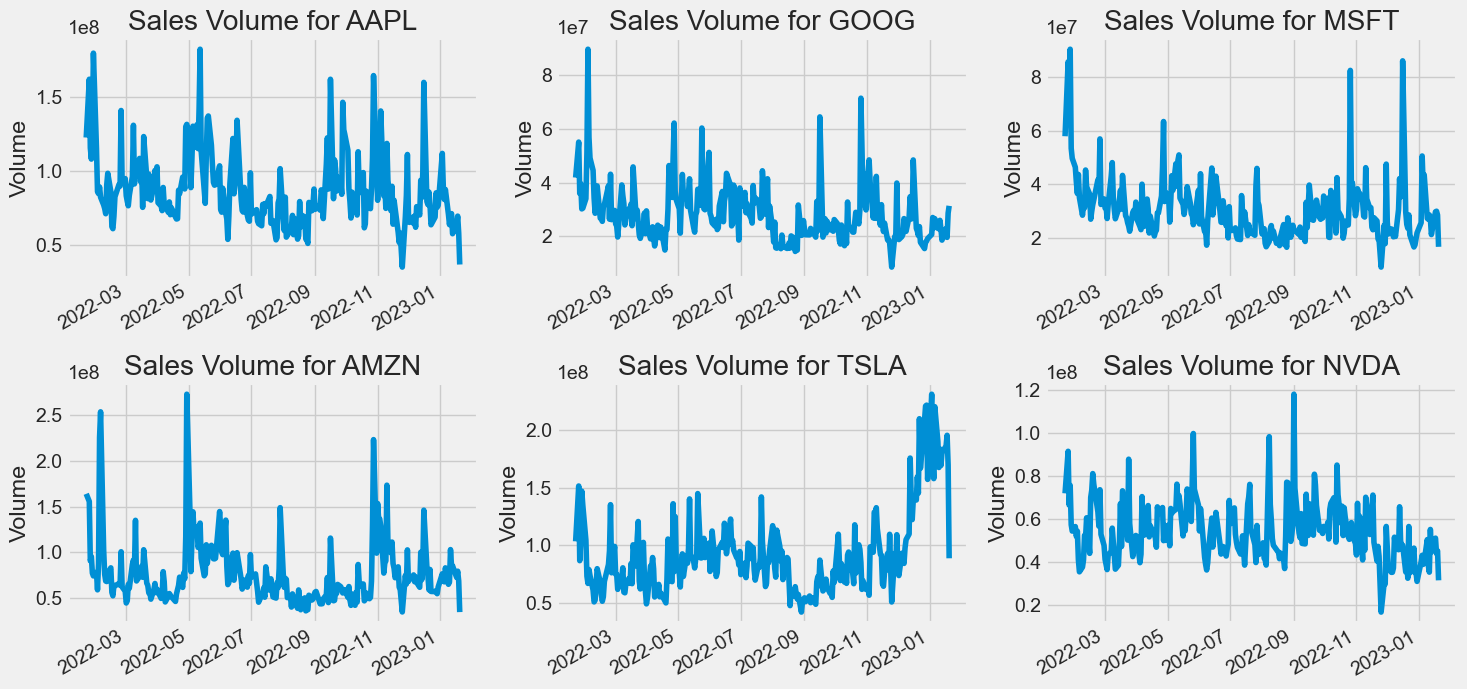

In [30]:
# Now let's plot the total volume of stock being traded each day
# 일간 거래량
plt.figure(figsize=(15, 10))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
    plt.subplot(3, 3, i)
    company['Volume'].plot()
    plt.ylabel('Volume')
    plt.xlabel(None)
    plt.title(f"Sales Volume for {tech_list[i - 1]}")

plt.tight_layout()

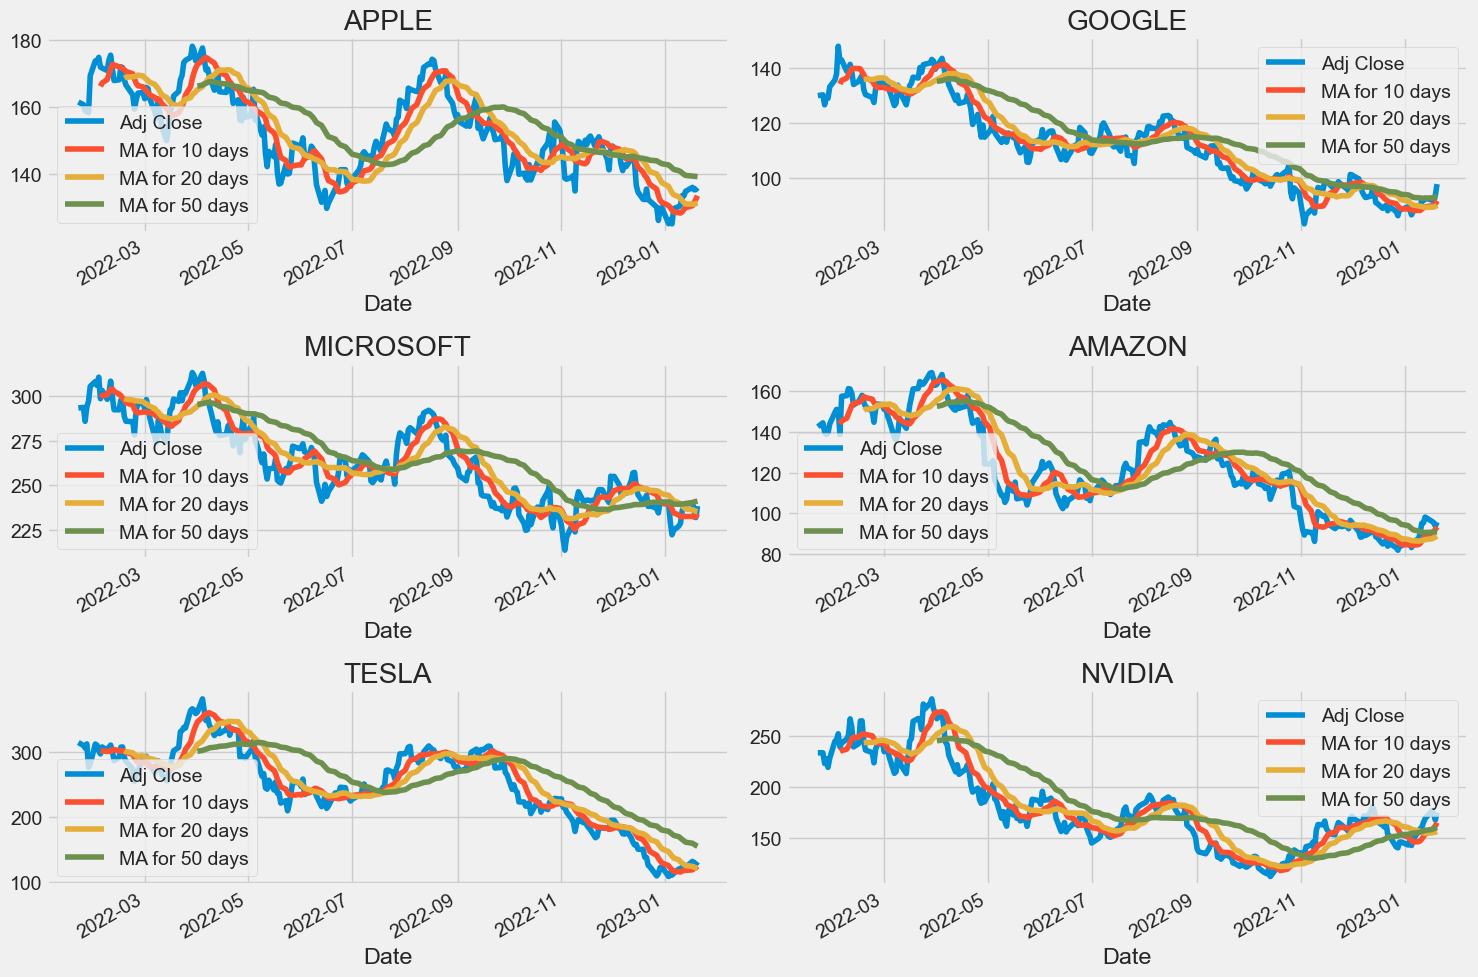

In [31]:
ma_day = [10, 20, 50]

for ma in ma_day:
    for company in company_list:
        column_name = f"MA for {ma} days"
        company[column_name] = company['Adj Close'].rolling(ma).mean()


fig, axes = plt.subplots(nrows=3, ncols=2)
fig.set_figheight(10)
fig.set_figwidth(15)

AAPL[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0,0])
axes[0,0].set_title('APPLE')

GOOG[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0,1])
axes[0,1].set_title('GOOGLE')

MSFT[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1,0])
axes[1,0].set_title('MICROSOFT')

AMZN[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1,1])
axes[1,1].set_title('AMAZON')

TSLA[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[2,0])
axes[2,0].set_title('TESLA')

NVDA[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[2,1])
axes[2,1].set_title('NVIDIA')

fig.tight_layout()

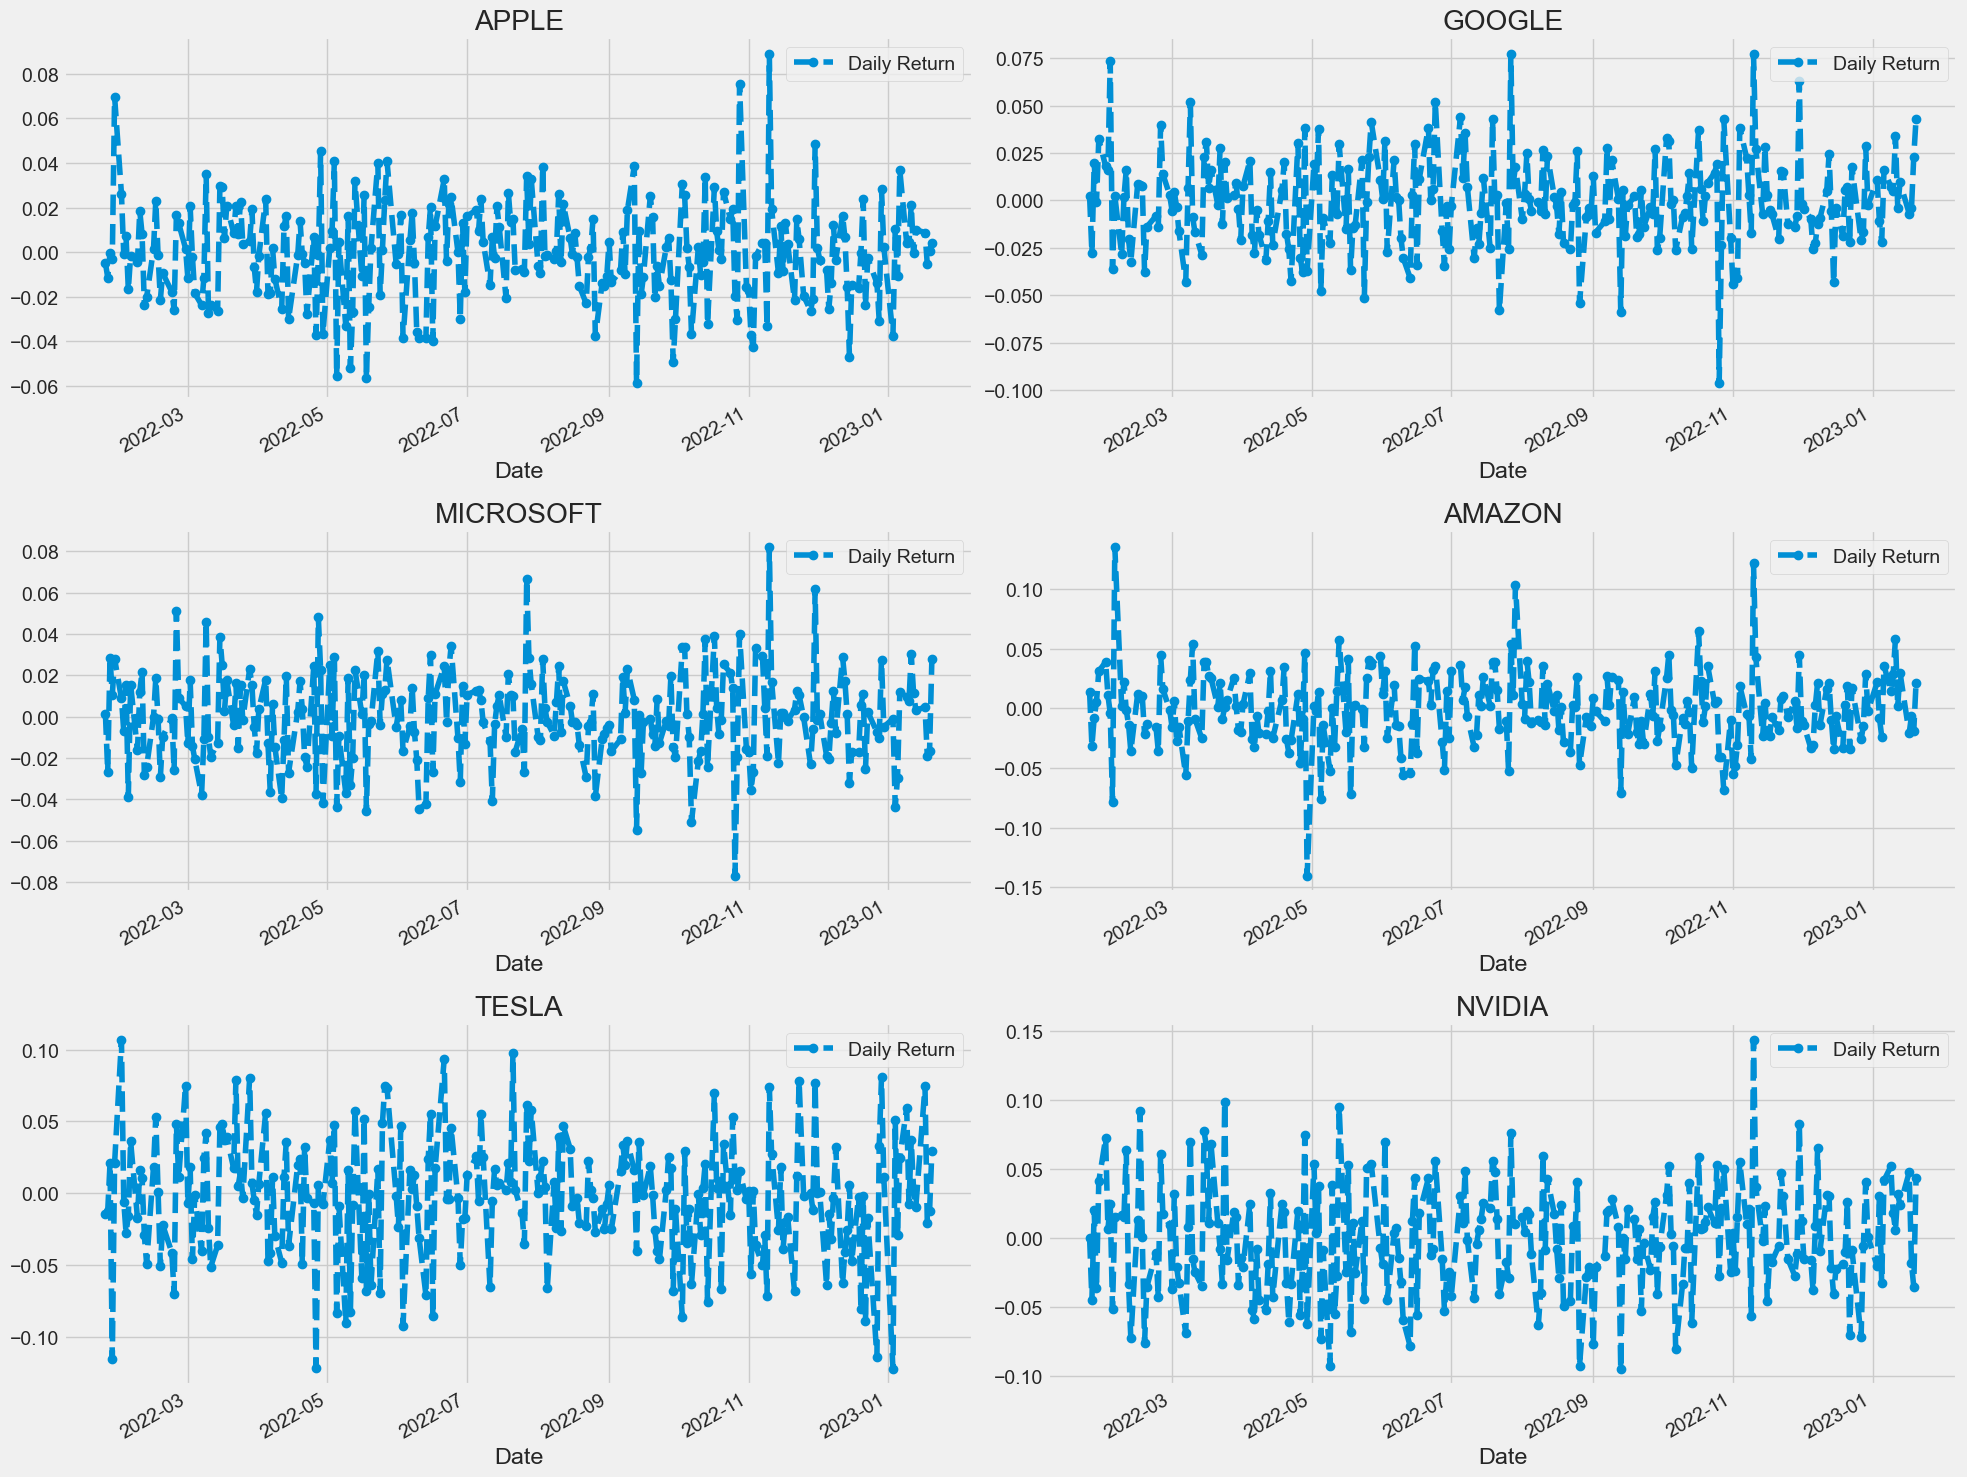

In [32]:
# We'll use pct_change to find the percent change for each day
# 일간 등락률
for company in company_list:
    company['Daily Return'] = company['Adj Close'].pct_change()

# Then we'll plot the daily return percentage
fig, axes = plt.subplots(nrows=3, ncols=2)
fig.set_figheight(15)
fig.set_figwidth(20)

AAPL['Daily Return'].plot(ax=axes[0,0], legend=True, linestyle='--', marker='o')
axes[0,0].set_title('APPLE')

GOOG['Daily Return'].plot(ax=axes[0,1], legend=True, linestyle='--', marker='o')
axes[0,1].set_title('GOOGLE')

MSFT['Daily Return'].plot(ax=axes[1,0], legend=True, linestyle='--', marker='o')
axes[1,0].set_title('MICROSOFT')

AMZN['Daily Return'].plot(ax=axes[1,1], legend=True, linestyle='--', marker='o')
axes[1,1].set_title('AMAZON')

TSLA['Daily Return'].plot(ax=axes[2,0], legend=True, linestyle='--', marker='o')
axes[2,0].set_title('TESLA')

NVDA['Daily Return'].plot(ax=axes[2,1], legend=True, linestyle='--', marker='o')
axes[2,1].set_title('NVIDIA')


fig.tight_layout()

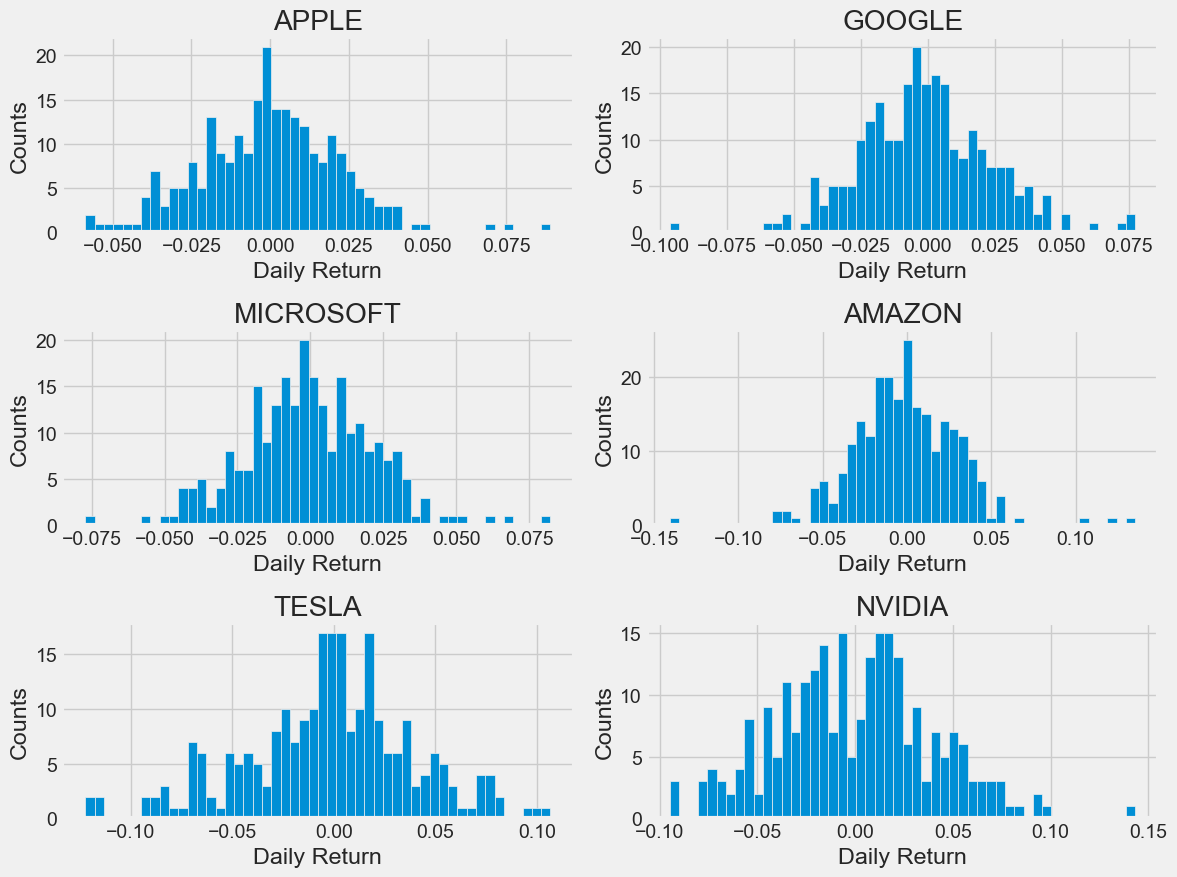

In [33]:
plt.figure(figsize=(12, 9))

for i, company in enumerate(company_list, 1):
    plt.subplot(3, 2, i)
    company['Daily Return'].hist(bins=50)
    plt.xlabel('Daily Return')
    plt.ylabel('Counts')
    plt.title(f'{company_name[i - 1]}')

plt.tight_layout()

In [65]:
from pandas_datareader import data as pdr
yf.pdr_override()
# Grab all the closing prices for the tech stock list into one DataFrame
# closing_df = DataReader(tech_list, 'yahoo', start="2022-01-01")['Adj Close']
closing_df = pdr.get_data_yahoo(tech_list,start="2022-01-20", progress = False)['Adj Close']
# Make a new tech returns DataFrame
tech_rets = closing_df.pct_change()
tech_rets.head()

,AAPL,AMZN,GOOG,MSFT,NVDA,TSLA
Date,,,,,,
2022-01-20,NaN,NaN,NaN,NaN,NaN,NaN
2022-01-21,-0.012765,-0.059502,-0.025576,-0.018468,-0.032132,-0.052566
2022-01-24,-0.004864,0.013327,0.002152,0.001149,-0.000086,-0.014726
2022-01-25,-0.011385,-0.031534,-0.027893,-0.026588,-0.044840,-0.012473
2022-01-26,-0.000563,-0.007954,0.019762,0.028493,0.020068,0.020699


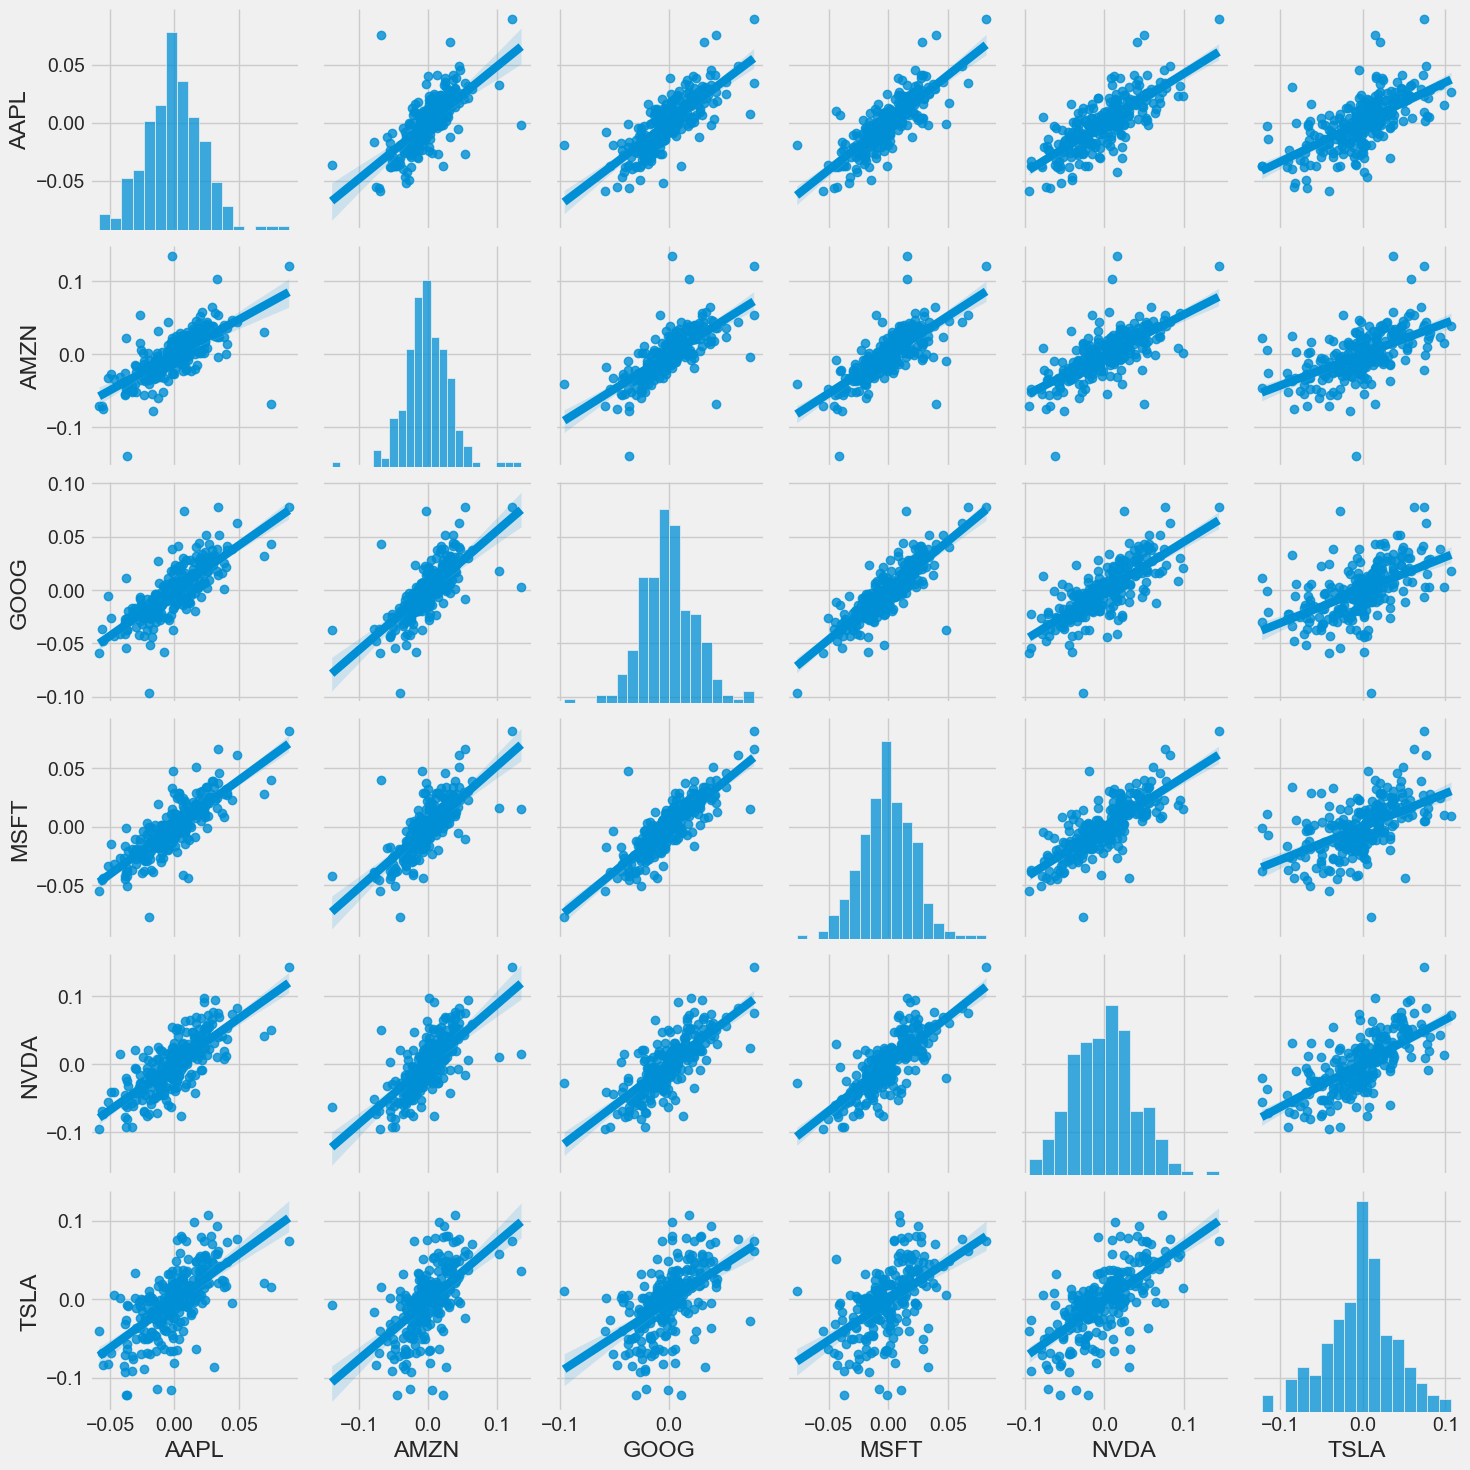

In [66]:
# 각 데이터의 상관관계 분석하기
sns.pairplot(tech_rets, kind='reg')

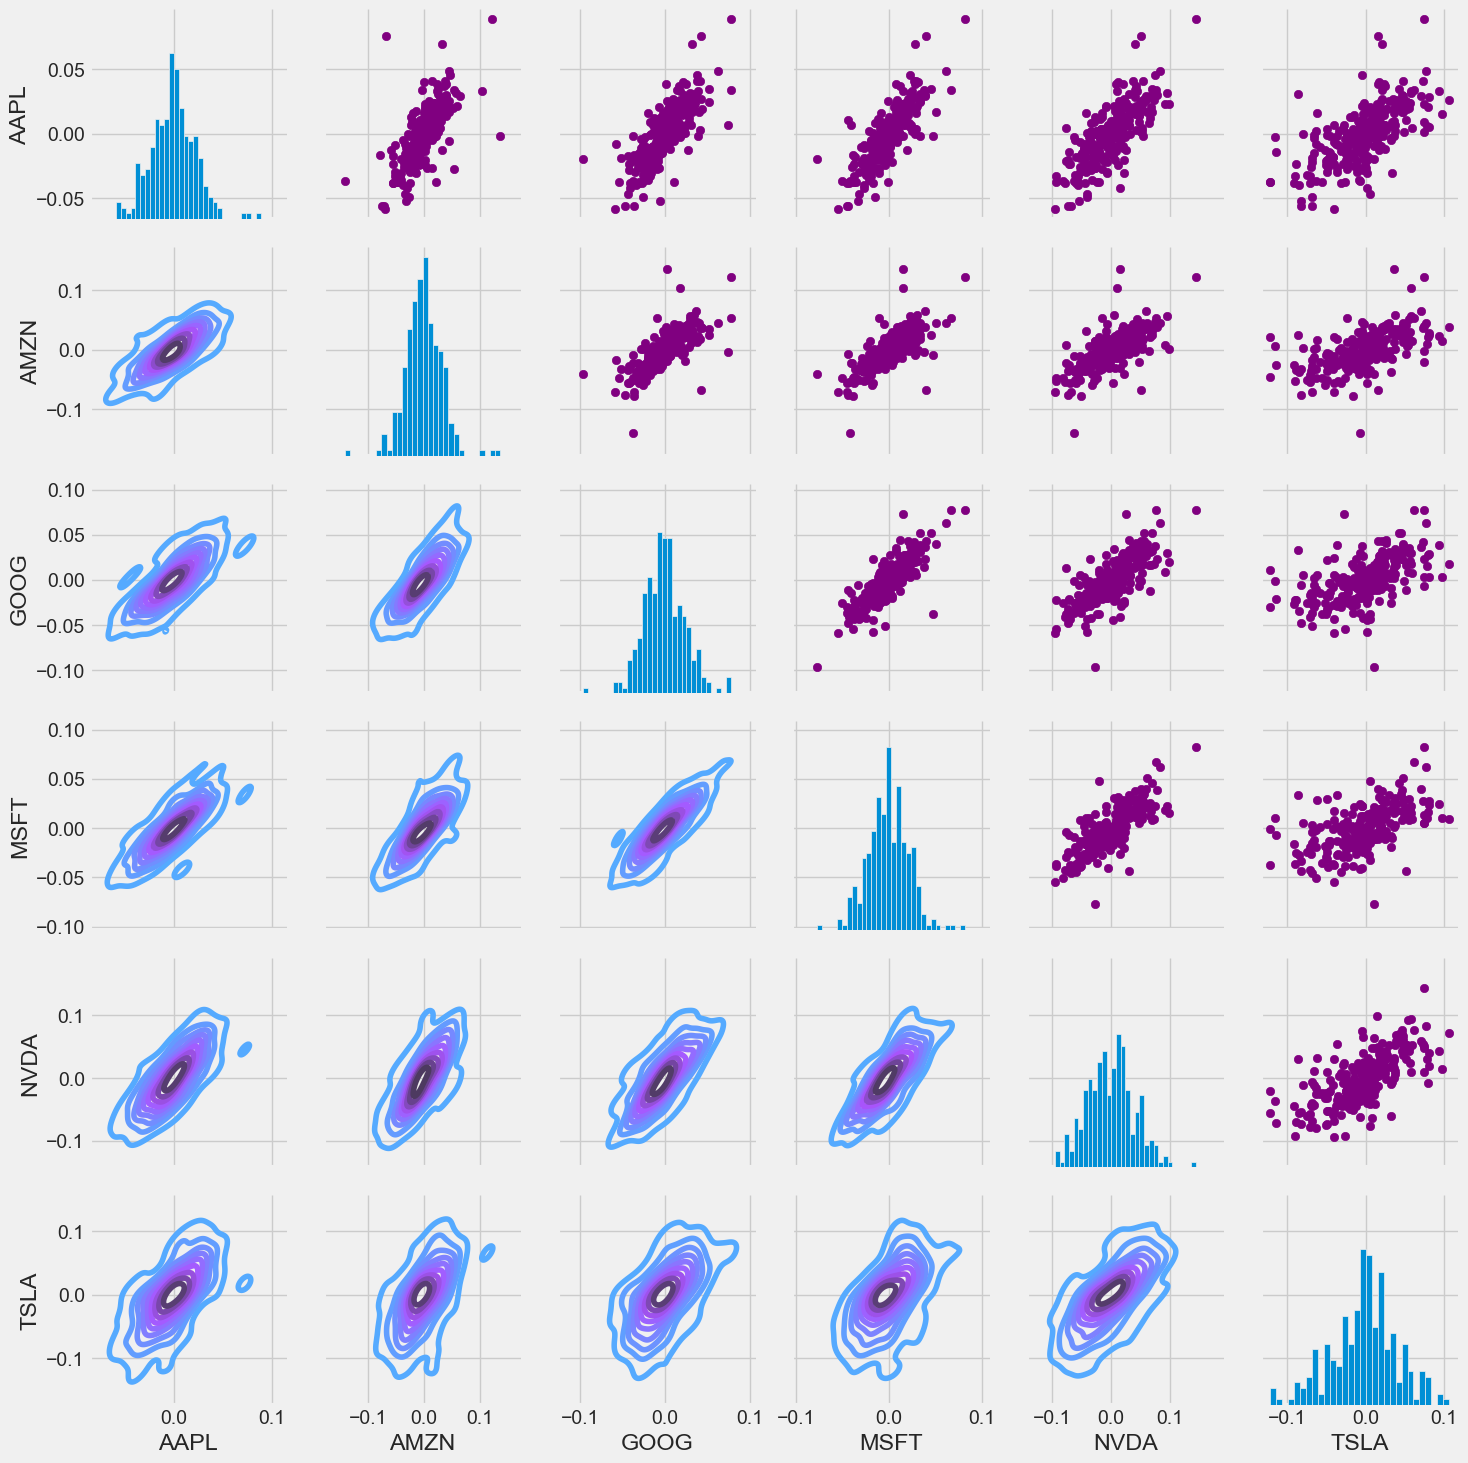

In [67]:
# Set up our figure by naming it returns_fig, call PairPLot on the DataFrame
return_fig = sns.PairGrid(tech_rets.dropna())

# Using map_upper we can specify what the upper triangle will look like.
return_fig.map_upper(plt.scatter, color='purple')

# We can also define the lower triangle in the figure, inclufing the plot type (kde)
# or the color map (BluePurple)
return_fig.map_lower(sns.kdeplot, cmap='cool_d')

# Finally we'll define the diagonal as a series of histogram plots of the daily return
return_fig.map_diag(plt.hist, bins=30)

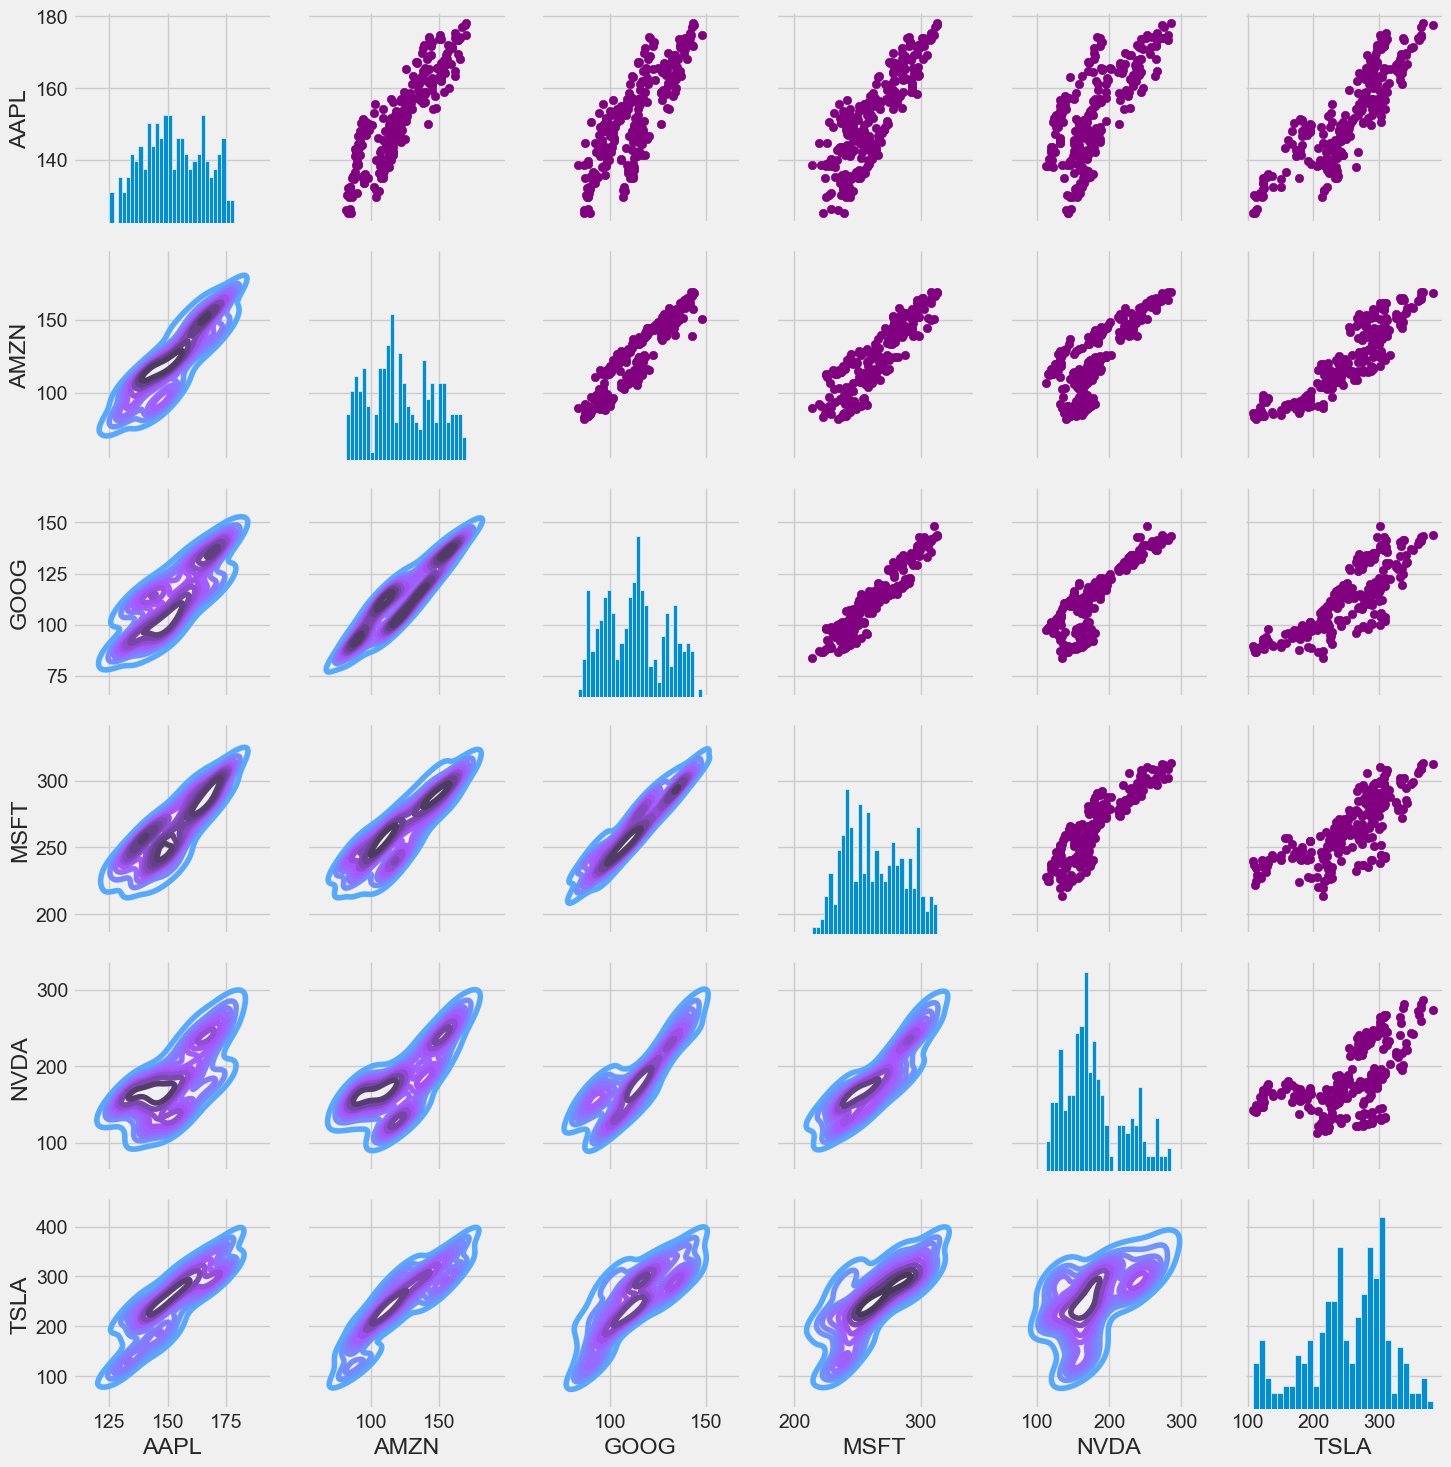

In [68]:
# Set up our figure by naming it returns_fig, call PairPLot on the DataFrame
returns_fig = sns.PairGrid(closing_df)

# Using map_upper we can specify what the upper triangle will look like.
returns_fig.map_upper(plt.scatter,color='purple')

# We can also define the lower triangle in the figure, inclufing the plot type (kde) or the color map (BluePurple)
returns_fig.map_lower(sns.kdeplot,cmap='cool_d')

# Finally we'll define the diagonal as a series of histogram plots of the daily return
returns_fig.map_diag(plt.hist,bins=30)

Text(0.5, 1.0, 'Correlation of stock closing price')

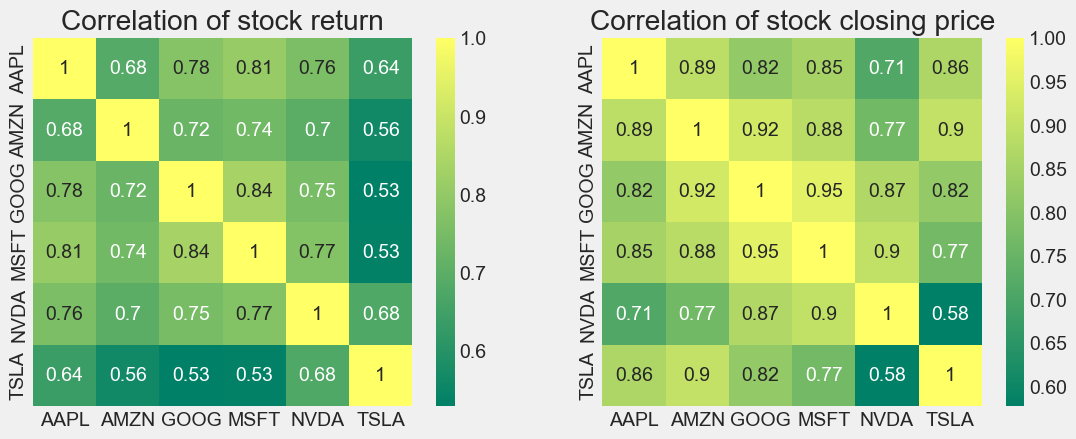

In [69]:
plt.figure(figsize=(12, 10))

plt.subplot(2, 2, 1)
sns.heatmap(tech_rets.corr(), annot=True, cmap='summer')
plt.title('Correlation of stock return')

plt.subplot(2, 2, 2)
sns.heatmap(closing_df.corr(), annot=True, cmap='summer')
plt.title('Correlation of stock closing price')

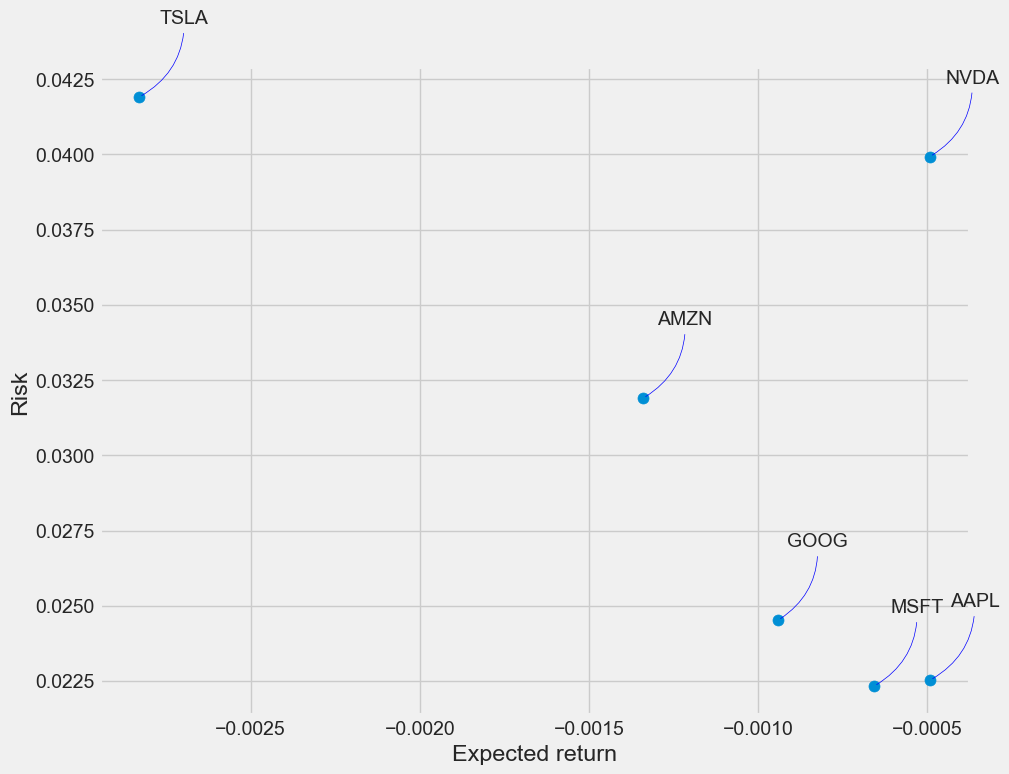

In [70]:
rets = tech_rets.dropna()

area = np.pi * 20

plt.figure(figsize=(10, 8))
plt.scatter(rets.mean(), rets.std(), s=area)
plt.xlabel('Expected return')
plt.ylabel('Risk')

for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(label, xy=(x, y), xytext=(50, 50), textcoords='offset points', ha='right', va='bottom', arrowprops=dict(arrowstyle='-', color='blue', connectionstyle='arc3,rad=-0.3'))

In [74]:
# Get the stock quote
df = pdr.get_data_yahoo("TSLA",start="2019-01-01", progress = False)
# Show teh data
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-01-02,20.406668,21.008667,19.920000,20.674667,20.674667,174879000
2019-01-03,20.466667,20.626667,19.825333,20.024000,20.024000,104478000
2019-01-04,20.400000,21.200001,20.181999,21.179333,21.179333,110911500
2019-01-07,21.448000,22.449333,21.183332,22.330667,22.330667,113268000
2019-01-08,22.797333,22.934000,21.801332,22.356667,22.356667,105127500
...,...,...,...,...,...,...
2023-01-13,116.550003,122.629997,115.599998,122.400002,122.400002,180439300
2023-01-17,125.699997,131.699997,125.019997,131.490005,131.490005,186477000
2023-01-18,136.559998,136.679993,127.010002,128.779999,128.779999,195680300


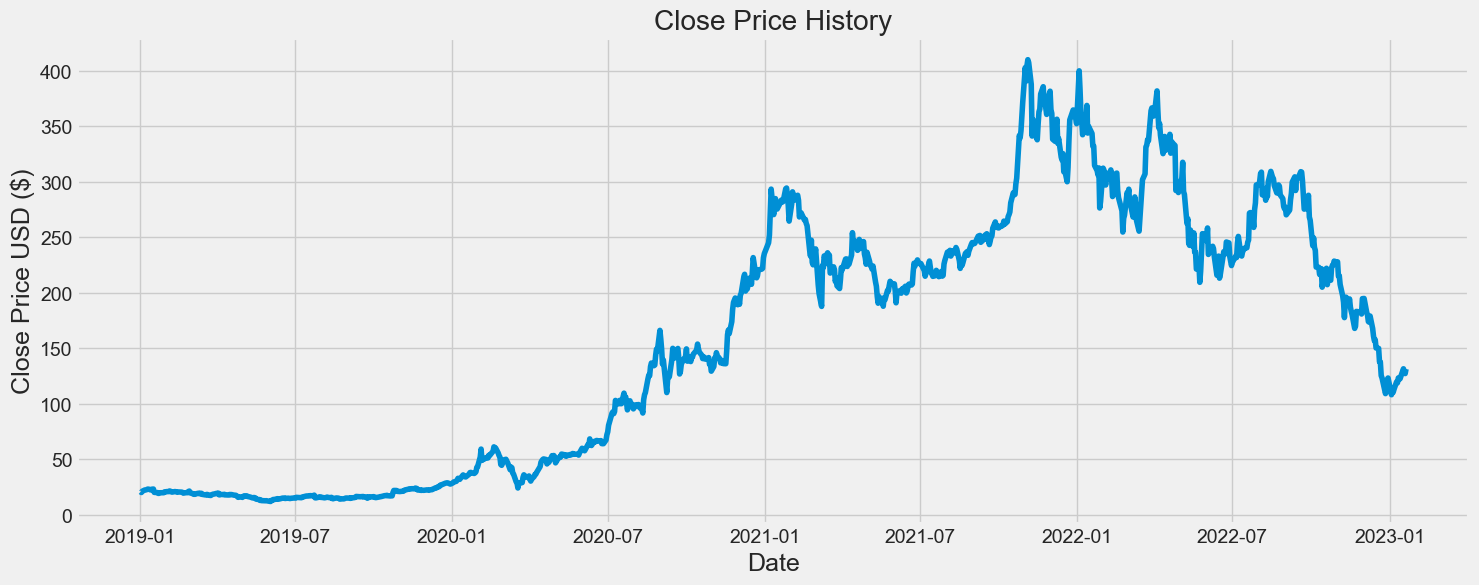

In [75]:
plt.figure(figsize=(16,6))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()

In [76]:
# Create a new dataframe with only the 'Close column
data = df.filter(['Close'])
# Convert the dataframe to a numpy array
dataset = data.values
# Get the number of rows to train the model on
training_data_len = int(np.ceil( len(dataset) * .95 ))

training_data_len

970

In [78]:
# Scale the data
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.02196604],
       [0.02033136],
       [0.02323392],
       ...,
       [0.29356109],
       [0.28951626],
       [0.29978661]])

In [79]:
# Create the training data set
# Create the scaled training data set
train_data = scaled_data[0:int(training_data_len), :]
# Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 61:
        print(x_train)
        print(y_train)
        print()

# Convert the x_train and y_train to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
# x_train.shape

[array([0.02196604, 0.02033136, 0.02323392, 0.02612644, 0.02619176,
       0.02672437, 0.02780299, 0.02818654, 0.02603265, 0.02771255,
       0.02798388, 0.02819492, 0.02064959, 0.02009018, 0.01819254,
       0.01884909, 0.0197753 , 0.01966476, 0.01984565, 0.02173993,
       0.02144683, 0.02231609, 0.02242998, 0.02384693, 0.02315521,
       0.0215289 , 0.0212425 , 0.02242161, 0.02224909, 0.02163944,
       0.02090249, 0.02159087, 0.02121569, 0.02069984, 0.01880219,
       0.01938505, 0.02006505, 0.01991264, 0.02273984, 0.02360072,
       0.01939845, 0.01781904, 0.0163418 , 0.01629155, 0.01635017,
       0.01761471, 0.01875027, 0.01748407, 0.018422  , 0.01858949,
       0.01615588, 0.01516101, 0.01482268, 0.01584938, 0.01591973,
       0.01433026, 0.01364189, 0.01487293, 0.01605539, 0.01669017])]
[0.016897857710496657]

[array([0.02196604, 0.02033136, 0.02323392, 0.02612644, 0.02619176,
       0.02672437, 0.02780299, 0.02818654, 0.02603265, 0.02771255,
       0.02798388, 0.02819492, 0.0

In [82]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

# Build the LSTM model
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)

2023-01-21 03:42:17.093950: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-01-21 03:42:17.246337: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-01-21 03:42:17.282368: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-01-21 03:42:17.349204: W tensorflow/core/framework/op_kernel.cc:1830] OP_REQUIRES failed at xla_ops.cc:418 : NOT_FOUND: could not find registered platform with id: 0x292555a30
2023-01-21 03:42:17.349232: W tensorflow/core/framework/op_kernel.cc:1830] OP_REQUIRES failed at xla_ops.cc:418 : NOT_FOUND: could not find registered platform with id: 0x292555a30
2023-01-21 03:42:17.351211: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-01-21 03:42:1

NotFoundError: Graph execution error:

Detected at node 'StatefulPartitionedCall_8' defined at (most recent call last):
    File "/Library/Developer/CommandLineTools/Library/Frameworks/Python3.framework/Versions/3.9/lib/python3.9/runpy.py", line 197, in _run_module_as_main
      return _run_code(code, main_globals, None,
    File "/Library/Developer/CommandLineTools/Library/Frameworks/Python3.framework/Versions/3.9/lib/python3.9/runpy.py", line 87, in _run_code
      exec(code, run_globals)
    File "/Users/taewan/PycharmProjects/stock/venv/lib/python3.10/lib/python3.9/site-packages/ipykernel_launcher.py", line 17, in <module>
      app.launch_new_instance()
    File "/Users/taewan/PycharmProjects/stock/venv/lib/python3.10/lib/python3.9/site-packages/traitlets/config/application.py", line 992, in launch_instance
      app.start()
    File "/Users/taewan/PycharmProjects/stock/venv/lib/python3.10/lib/python3.9/site-packages/ipykernel/kernelapp.py", line 711, in start
      self.io_loop.start()
    File "/Users/taewan/PycharmProjects/stock/venv/lib/python3.10/lib/python3.9/site-packages/tornado/platform/asyncio.py", line 215, in start
      self.asyncio_loop.run_forever()
    File "/Library/Developer/CommandLineTools/Library/Frameworks/Python3.framework/Versions/3.9/lib/python3.9/asyncio/base_events.py", line 596, in run_forever
      self._run_once()
    File "/Library/Developer/CommandLineTools/Library/Frameworks/Python3.framework/Versions/3.9/lib/python3.9/asyncio/base_events.py", line 1890, in _run_once
      handle._run()
    File "/Library/Developer/CommandLineTools/Library/Frameworks/Python3.framework/Versions/3.9/lib/python3.9/asyncio/events.py", line 80, in _run
      self._context.run(self._callback, *self._args)
    File "/Users/taewan/PycharmProjects/stock/venv/lib/python3.10/lib/python3.9/site-packages/ipykernel/kernelbase.py", line 510, in dispatch_queue
      await self.process_one()
    File "/Users/taewan/PycharmProjects/stock/venv/lib/python3.10/lib/python3.9/site-packages/ipykernel/kernelbase.py", line 499, in process_one
      await dispatch(*args)
    File "/Users/taewan/PycharmProjects/stock/venv/lib/python3.10/lib/python3.9/site-packages/ipykernel/kernelbase.py", line 406, in dispatch_shell
      await result
    File "/Users/taewan/PycharmProjects/stock/venv/lib/python3.10/lib/python3.9/site-packages/ipykernel/kernelbase.py", line 729, in execute_request
      reply_content = await reply_content
    File "/Users/taewan/PycharmProjects/stock/venv/lib/python3.10/lib/python3.9/site-packages/ipykernel/ipkernel.py", line 411, in do_execute
      res = shell.run_cell(
    File "/Users/taewan/PycharmProjects/stock/venv/lib/python3.10/lib/python3.9/site-packages/ipykernel/zmqshell.py", line 531, in run_cell
      return super().run_cell(*args, **kwargs)
    File "/Users/taewan/PycharmProjects/stock/venv/lib/python3.10/lib/python3.9/site-packages/IPython/core/interactiveshell.py", line 2940, in run_cell
      result = self._run_cell(
    File "/Users/taewan/PycharmProjects/stock/venv/lib/python3.10/lib/python3.9/site-packages/IPython/core/interactiveshell.py", line 2995, in _run_cell
      return runner(coro)
    File "/Users/taewan/PycharmProjects/stock/venv/lib/python3.10/lib/python3.9/site-packages/IPython/core/async_helpers.py", line 129, in _pseudo_sync_runner
      coro.send(None)
    File "/Users/taewan/PycharmProjects/stock/venv/lib/python3.10/lib/python3.9/site-packages/IPython/core/interactiveshell.py", line 3194, in run_cell_async
      has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
    File "/Users/taewan/PycharmProjects/stock/venv/lib/python3.10/lib/python3.9/site-packages/IPython/core/interactiveshell.py", line 3373, in run_ast_nodes
      if await self.run_code(code, result, async_=asy):
    File "/Users/taewan/PycharmProjects/stock/venv/lib/python3.10/lib/python3.9/site-packages/IPython/core/interactiveshell.py", line 3433, in run_code
      exec(code_obj, self.user_global_ns, self.user_ns)
    File "/var/folders/xq/lsnzvcmx4c1fglwj6nlhf1qc0000gn/T/ipykernel_53460/668065096.py", line 15, in <module>
      model.fit(x_train, y_train, batch_size=1, epochs=1)
    File "/Users/taewan/PycharmProjects/stock/venv/lib/python3.10/lib/python3.9/site-packages/keras/utils/traceback_utils.py", line 65, in error_handler
      except Exception as e:  # pylint: disable=broad-except
    File "/Users/taewan/PycharmProjects/stock/venv/lib/python3.10/lib/python3.9/site-packages/keras/engine/training.py", line 1650, in fit
      `ParameterServerStrategy`. Note that the progress bar is not
    File "/Users/taewan/PycharmProjects/stock/venv/lib/python3.10/lib/python3.9/site-packages/keras/engine/training.py", line 1249, in train_function
      `tf.data` dataset, and 'steps_per_epoch'
    File "/Users/taewan/PycharmProjects/stock/venv/lib/python3.10/lib/python3.9/site-packages/keras/engine/training.py", line 1233, in step_function
      you can pass a 2D array with shape
    File "/Users/taewan/PycharmProjects/stock/venv/lib/python3.10/lib/python3.9/site-packages/keras/engine/training.py", line 1222, in run_step
      to a weight (float) value, used for weighting the loss function
    File "/Users/taewan/PycharmProjects/stock/venv/lib/python3.10/lib/python3.9/site-packages/keras/engine/training.py", line 1027, in train_step
      """Runs a single training step."""
    File "/Users/taewan/PycharmProjects/stock/venv/lib/python3.10/lib/python3.9/site-packages/keras/optimizers/optimizer_experimental/optimizer.py", line 527, in minimize
    File "/Users/taewan/PycharmProjects/stock/venv/lib/python3.10/lib/python3.9/site-packages/keras/optimizers/optimizer_experimental/optimizer.py", line 1140, in apply_gradients
    File "/Users/taewan/PycharmProjects/stock/venv/lib/python3.10/lib/python3.9/site-packages/keras/optimizers/optimizer_experimental/optimizer.py", line 634, in apply_gradients
      ...   initial_learning_rate=.01, decay_steps=20, decay_rate=.1)
    File "/Users/taewan/PycharmProjects/stock/venv/lib/python3.10/lib/python3.9/site-packages/keras/optimizers/optimizer_experimental/optimizer.py", line 1166, in _internal_apply_gradients
    File "/Users/taewan/PycharmProjects/stock/venv/lib/python3.10/lib/python3.9/site-packages/keras/optimizers/optimizer_experimental/optimizer.py", line 1216, in _distributed_apply_gradients_fn
    File "/Users/taewan/PycharmProjects/stock/venv/lib/python3.10/lib/python3.9/site-packages/keras/optimizers/optimizer_experimental/optimizer.py", line 1211, in apply_grad_to_update_var
Node: 'StatefulPartitionedCall_8'
could not find registered platform with id: 0x292555a30
	 [[{{node StatefulPartitionedCall_8}}]] [Op:__inference_train_function_15193]